# Actividad 5. Extracción de Características

In [130]:
#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [131]:
#carga de archivos
micro_retail = pd.read_excel("microretailer_mit_lift_lab.xlsx")
micro_retail

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),19.043115,-98.194066,July Store,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,"November 3, 2022",2022-11-03 16:28:15 UTC,Emilio Garza,SRID=4326;POINT(-98.1938023854 19.0427938182),19.042794,-98.193802,Miscelánea rubí,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),19.042809,-98.193439,La fonda,1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),19.042558,-98.193818,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Creación de nuevo dataframe

In [132]:
#Filtración de columnas
micro_retail1 = micro_retail.iloc[: , [3, 9, 10, 11, 12, 13, 21, 22, 23, 24, 25, 31, 34, 47, 48, 82, 83, 86, 90, 101]]
micro_retail1

,_updated_by,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,97_number_of_customers_in_store,2_current_permanent_employees,4_number_permanent_employees_last_year,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,145_number_direct_competitors,186_internet_connection,214_customer_relationship_tools,33_credit_to_customers,192_procurement_planning_tools,277_payment_method_suppliers,157_frequency_organize_shelves,163_number_high_perishable_products,234_willingness_participate_workshop
0,Salomon Abdala Perez,Tailor,yes,no,no,2,2.0,2.0,No cambió,No cambió,yes,3.0,yes,Redes sociales,no,NaN,NaN,Semestralmente,0.0,no
1,Salomon Abdala Perez,Grocery store (aka. nanostore),no,yes,yes,0,1.0,1.0,Aumentó 15%,No cambió,yes,4.0,yes,Aplicación móvil,no,NaN,Transferencia interbancaria,NaN,60.0,no
2,Salomon Abdala Perez,Grocery store (aka. nanostore),yes,no,no,0,2.0,2.0,No cambió,No cambió,yes,0.0,yes,Redes sociales,yes,NaN,NaN,Semanalmente,60.0,no
3,Salomon Abdala Perez,Grocery store (aka. nanostore),no,no,no,0,1.0,1.0,No cambió,No cambió,yes,4.0,yes,Teléfono,no,NaN,NaN,Semanalmente,0.0,no
4,Salomon Abdala Perez,Grocery store (aka. nanostore),yes,no,no,0,0.0,0.0,No cambió,No cambió,yes,0.0,yes,NaN,yes,NaN,NaN,Mensualmente,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Emilio Garza,Grocery store (aka. nanostore),yes,no,no,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,Emilio Garza,Grocery store (aka. nanostore),no,no,no,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,Emilio Garza,Micro-restaurant (aka. fondita),yes,no,yes,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,Francisco Adán,Micro-restaurant (aka. fondita),no,no,yes,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
micro_retail1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   _updated_by                                            171 non-null    object 
 1   232_type_of_store                                      171 non-null    object 
 2   108_does_the_micro_retailer_has_a_barred_window_       171 non-null    object 
 3   99_does_the_micro_retailer_exhibits_products_outside_  171 non-null    object 
 4   102_does_the_micro_retailer_sells_fresh_products_      171 non-null    object 
 5   97_number_of_customers_in_store                        171 non-null    int64  
 6   2_current_permanent_employees                          111 non-null    float64
 7   4_number_permanent_employees_last_year                 95 non-null     float64
 8   5_change_store_space_last_year                    

## Valores Nulos

### Visualización de valores nulos

In [134]:
micro_retail1.isnull().sum().sum()

1075

In [135]:
micro_retail1.isnull().sum()

_updated_by                                                0
232_type_of_store                                          0
108_does_the_micro_retailer_has_a_barred_window_           0
99_does_the_micro_retailer_exhibits_products_outside_      0
102_does_the_micro_retailer_sells_fresh_products_          0
97_number_of_customers_in_store                            0
2_current_permanent_employees                             60
4_number_permanent_employees_last_year                    76
5_change_store_space_last_year                            72
6_change_employees_average_salary_last_year               86
20_reviews_finances_monthly                               63
145_number_direct_competitors                             68
186_internet_connection                                   63
214_customer_relationship_tools                           76
33_credit_to_customers                                    64
192_procurement_planning_tools                           103
277_payment_method_suppl

### Tratamiento de valores nulos
* Mediana
    * 2_current_permanent_employees                          
    * 4_number_permanent_employees_last_year
    * 145_number_direct_competitors 
    * 163_number_high_perishable_products
* String
    * 5_change_store_space_last_year                         
    * 6_change_employees_average_salary_last_year
    * 20_reviews_finances_monthly
    * 186_internet_connection 
    * 214_customer_relationship_tools 
    * 33_credit_to_customers
    * 192_procurement_planning_tools                         
    * 277_payment_method_suppliers                           
    * 157_frequency_organize_shelves 
    * 234_willingness_participate_workshop 

In [136]:
#Copia de data frame
micro_retail2 = micro_retail1.copy()

In [137]:
#Cambio con mediana
    # 2_current_permanent_employees                          
    # 4_number_permanent_employees_last_year
    # 145_number_direct_competitors 
    # 163_number_high_perishable_products
columnas_a_llenar_median = ["2_current_permanent_employees", "4_number_permanent_employees_last_year", "145_number_direct_competitors", "163_number_high_perishable_products"]
micro_retail2[columnas_a_llenar_median] = micro_retail2[columnas_a_llenar_median].fillna(micro_retail1[columnas_a_llenar_median].median())

In [138]:
#Verificamos
micro_retail2.isnull().sum()

_updated_by                                                0
232_type_of_store                                          0
108_does_the_micro_retailer_has_a_barred_window_           0
99_does_the_micro_retailer_exhibits_products_outside_      0
102_does_the_micro_retailer_sells_fresh_products_          0
97_number_of_customers_in_store                            0
2_current_permanent_employees                              0
4_number_permanent_employees_last_year                     0
5_change_store_space_last_year                            72
6_change_employees_average_salary_last_year               86
20_reviews_finances_monthly                               63
145_number_direct_competitors                              0
186_internet_connection                                   63
214_customer_relationship_tools                           76
33_credit_to_customers                                    64
192_procurement_planning_tools                           103
277_payment_method_suppl

In [139]:
#Por string
    # 5_change_store_space_last_year                         
    # 6_change_employees_average_salary_last_year
    # 20_reviews_finances_monthly
    # 186_internet_connection 
    # 214_customer_relationship_tools 
    # 33_credit_to_customers
    # 192_procurement_planning_tools                         
    # 277_payment_method_suppliers                           
    # 157_frequency_organize_shelves 
    # 234_willingness_participate_workshop 

columnas_rellenar_string = ["5_change_store_space_last_year", "6_change_employees_average_salary_last_year", "20_reviews_finances_monthly", "186_internet_connection", "214_customer_relationship_tools" , "33_credit_to_customers", "192_procurement_planning_tools", "277_payment_method_suppliers", "157_frequency_organize_shelves", "234_willingness_participate_workshop"]
micro_retail2[columnas_rellenar_string] = micro_retail[columnas_rellenar_string].fillna("Unknown")

In [140]:
#Verificamos
micro_retail2.isnull().sum()

_updated_by                                              0
232_type_of_store                                        0
108_does_the_micro_retailer_has_a_barred_window_         0
99_does_the_micro_retailer_exhibits_products_outside_    0
102_does_the_micro_retailer_sells_fresh_products_        0
97_number_of_customers_in_store                          0
2_current_permanent_employees                            0
4_number_permanent_employees_last_year                   0
5_change_store_space_last_year                           0
6_change_employees_average_salary_last_year              0
20_reviews_finances_monthly                              0
145_number_direct_competitors                            0
186_internet_connection                                  0
214_customer_relationship_tools                          0
33_credit_to_customers                                   0
192_procurement_planning_tools                           0
277_payment_method_suppliers                            

In [141]:
#Verificamos final
micro_retail2.isnull().sum().sum()

0

In [142]:
micro_retail2

,_updated_by,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,97_number_of_customers_in_store,2_current_permanent_employees,4_number_permanent_employees_last_year,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,145_number_direct_competitors,186_internet_connection,214_customer_relationship_tools,33_credit_to_customers,192_procurement_planning_tools,277_payment_method_suppliers,157_frequency_organize_shelves,163_number_high_perishable_products,234_willingness_participate_workshop
0,Salomon Abdala Perez,Tailor,yes,no,no,2,2.0,2.0,No cambió,No cambió,yes,3.0,yes,Redes sociales,no,Unknown,Unknown,Semestralmente,0.0,no
1,Salomon Abdala Perez,Grocery store (aka. nanostore),no,yes,yes,0,1.0,1.0,Aumentó 15%,No cambió,yes,4.0,yes,Aplicación móvil,no,Unknown,Transferencia interbancaria,Unknown,60.0,no
2,Salomon Abdala Perez,Grocery store (aka. nanostore),yes,no,no,0,2.0,2.0,No cambió,No cambió,yes,0.0,yes,Redes sociales,yes,Unknown,Unknown,Semanalmente,60.0,no
3,Salomon Abdala Perez,Grocery store (aka. nanostore),no,no,no,0,1.0,1.0,No cambió,No cambió,yes,4.0,yes,Teléfono,no,Unknown,Unknown,Semanalmente,0.0,no
4,Salomon Abdala Perez,Grocery store (aka. nanostore),yes,no,no,0,0.0,0.0,No cambió,No cambió,yes,0.0,yes,Unknown,yes,Unknown,Unknown,Mensualmente,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Emilio Garza,Grocery store (aka. nanostore),yes,no,no,1,1.0,1.0,Unknown,Unknown,Unknown,3.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1.0,Unknown
167,Emilio Garza,Grocery store (aka. nanostore),no,no,no,1,1.0,1.0,Unknown,Unknown,Unknown,3.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1.0,Unknown
168,Emilio Garza,Micro-restaurant (aka. fondita),yes,no,yes,3,1.0,1.0,Unknown,Unknown,Unknown,3.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1.0,Unknown
169,Francisco Adán,Micro-restaurant (aka. fondita),no,no,yes,0,1.0,1.0,Unknown,Unknown,Unknown,3.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1.0,Unknown


## Outliers

### División de Data Frames
* Cuantitativas
    * 97_number_of_customers_in_store                  
    * 2_current_permanent_employees                      
    * 4_number_permanent_employees_last_year
    * 145_number_direct_competitors	
    * 163_number_high_perishable_products
* Cualitativas
    * _updated_by
    * 232_type_of_store                                          
    * 108_does_the_micro_retailer_has_a_barred_window_           
    * 99_does_the_micro_retailer_exhibits_products_outside_      
    * 102_does_the_micro_retailer_sells_fresh_products_          
    * 5_change_store_space_last_year                            
    * 6_change_employees_average_salary_last_year               
    * 20_reviews_finances_monthly                               
    * 186_internet_connection                                   
    * 214_customer_relationship_tools                           
    * 33_credit_to_customers                                    
    * 192_procurement_planning_tools                           
    * 277_payment_method_suppliers                             
    * 157_frequency_organize_shelves                           
    * 234_willingness_participate_workshop                     



In [143]:
#Cualitativas
columnas1 = micro_retail2.iloc[:, 0:5]
columnas2 = micro_retail2.iloc[:, 8:11]
columnas3 = micro_retail2.iloc[:, 12:18]
columnas4 = micro_retail2[["234_willingness_participate_workshop"]]
micro_retail2Cuali = pd.concat([columnas1, columnas2, columnas3, columnas4], axis=1)
micro_retail2Cuali

,_updated_by,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,186_internet_connection,214_customer_relationship_tools,33_credit_to_customers,192_procurement_planning_tools,277_payment_method_suppliers,157_frequency_organize_shelves,234_willingness_participate_workshop
0,Salomon Abdala Perez,Tailor,yes,no,no,No cambió,No cambió,yes,yes,Redes sociales,no,Unknown,Unknown,Semestralmente,no
1,Salomon Abdala Perez,Grocery store (aka. nanostore),no,yes,yes,Aumentó 15%,No cambió,yes,yes,Aplicación móvil,no,Unknown,Transferencia interbancaria,Unknown,no
2,Salomon Abdala Perez,Grocery store (aka. nanostore),yes,no,no,No cambió,No cambió,yes,yes,Redes sociales,yes,Unknown,Unknown,Semanalmente,no
3,Salomon Abdala Perez,Grocery store (aka. nanostore),no,no,no,No cambió,No cambió,yes,yes,Teléfono,no,Unknown,Unknown,Semanalmente,no
4,Salomon Abdala Perez,Grocery store (aka. nanostore),yes,no,no,No cambió,No cambió,yes,yes,Unknown,yes,Unknown,Unknown,Mensualmente,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Emilio Garza,Grocery store (aka. nanostore),yes,no,no,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
167,Emilio Garza,Grocery store (aka. nanostore),no,no,no,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
168,Emilio Garza,Micro-restaurant (aka. fondita),yes,no,yes,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
169,Francisco Adán,Micro-restaurant (aka. fondita),no,no,yes,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [144]:
#Cuantitativas
columnas5 = micro_retail2.iloc[:, 5:8]
columnas6 = micro_retail2["145_number_direct_competitors"]
columnas7 = micro_retail2["163_number_high_perishable_products"]
micro_retail2Cuanti = pd.concat([columnas5, columnas6, columnas7], axis = 1)
micro_retail2Cuanti.columns

Index(['97_number_of_customers_in_store', '2_current_permanent_employees',
       '4_number_permanent_employees_last_year',
       '145_number_direct_competitors', '163_number_high_perishable_products'],
      dtype='object')

### Visualización de Outliers

<Figure size 1500x800 with 0 Axes>

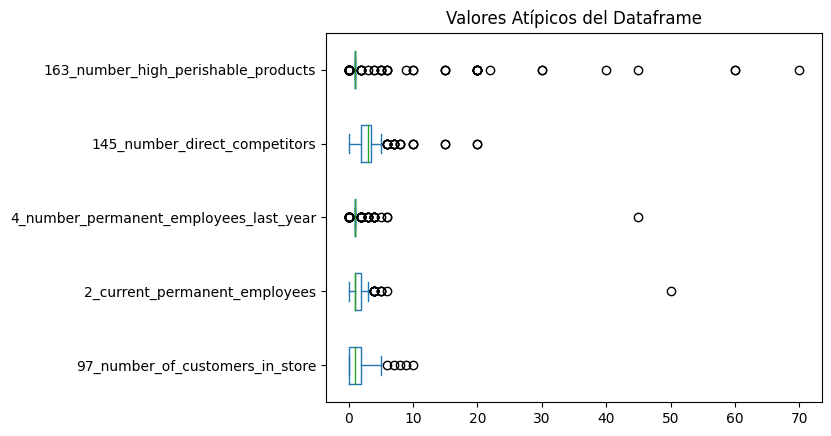

In [145]:
#Diagrama para visualizar valores atípicos
fig = plt.figure(figsize =(15, 8))
micro_retail2Cuanti.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

### Limpieza de outliers

In [146]:
#Se marcan límites
y = micro_retail2Cuanti
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 97_number_of_customers_in_store            6.591777
2_current_permanent_employees             13.373923
4_number_permanent_employees_last_year    12.073899
145_number_direct_competitors             12.127862
163_number_high_perishable_products       36.607978
dtype: float64
Limite inferior permitido 97_number_of_customers_in_store           -3.808151
2_current_permanent_employees             -9.993806
4_number_permanent_employees_last_year    -9.068051
145_number_direct_competitors             -5.215582
163_number_high_perishable_products      -27.637218
dtype: float64


In [147]:
#Observamos valores atípicos del data frame
outliers= micro_retail2Cuanti[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,97_number_of_customers_in_store,2_current_permanent_employees,4_number_permanent_employees_last_year,145_number_direct_competitors,163_number_high_perishable_products
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,60.0
2,NaN,NaN,NaN,NaN,60.0
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN


In [148]:
#Hacemos el cambio a un nuevo data frame
micro_retail2Cuanti3= micro_retail2Cuanti[(y<=Limite_Superior)&(y>=Limite_Inferior)]
micro_retail2Cuanti3

,97_number_of_customers_in_store,2_current_permanent_employees,4_number_permanent_employees_last_year,145_number_direct_competitors,163_number_high_perishable_products
0,2.0,2.0,2.0,3.0,0.0
1,0.0,1.0,1.0,4.0,NaN
2,0.0,2.0,2.0,0.0,NaN
3,0.0,1.0,1.0,4.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
166,1.0,1.0,1.0,3.0,1.0
167,1.0,1.0,1.0,3.0,1.0
168,3.0,1.0,1.0,3.0,1.0
169,0.0,1.0,1.0,3.0,1.0


In [149]:
#Vemos valores nulos
micro_retail2Cuanti3.isnull().sum()

97_number_of_customers_in_store           4
2_current_permanent_employees             1
4_number_permanent_employees_last_year    1
145_number_direct_competitors             4
163_number_high_perishable_products       5
dtype: int64

In [150]:
#Cambiamos los valores nulos que se crearon por la media
micro_retail2Cuanti4 = micro_retail2Cuanti3.copy()
micro_retail2Cuanti4 = micro_retail2Cuanti4.fillna(micro_retail2Cuanti3.mean())
micro_retail2Cuanti4

,97_number_of_customers_in_store,2_current_permanent_employees,4_number_permanent_employees_last_year,145_number_direct_competitors,163_number_high_perishable_products
0,2.0,2.0,2.0,3.0,0.000000
1,0.0,1.0,1.0,4.0,2.963855
2,0.0,2.0,2.0,0.0,2.963855
3,0.0,1.0,1.0,4.0,0.000000
4,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...
166,1.0,1.0,1.0,3.0,1.000000
167,1.0,1.0,1.0,3.0,1.000000
168,3.0,1.0,1.0,3.0,1.000000
169,0.0,1.0,1.0,3.0,1.000000


In [151]:
#Volvemos a verificar valores nulos
micro_retail2Cuanti4.isnull().sum()

97_number_of_customers_in_store           0
2_current_permanent_employees             0
4_number_permanent_employees_last_year    0
145_number_direct_competitors             0
163_number_high_perishable_products       0
dtype: int64

<Figure size 1500x800 with 0 Axes>

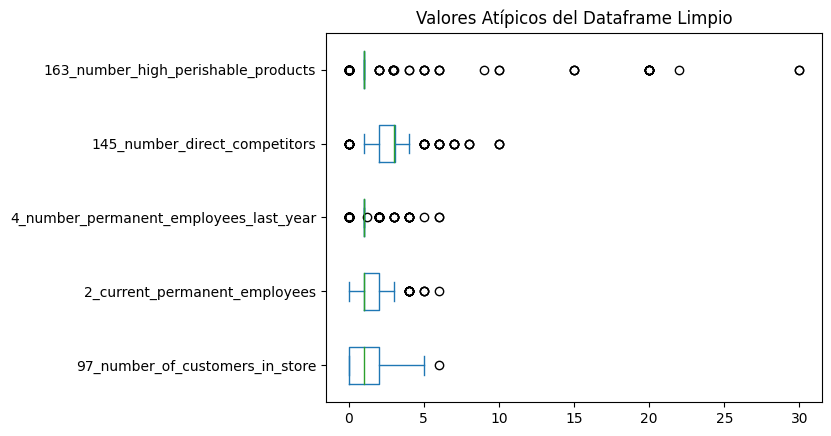

In [152]:
#Volvemos a observar en diagrama de cajas
fig = plt.figure(figsize =(15, 8))
micro_retail2Cuanti4.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe Limpio")
plt.show()

In [153]:
micro_retail5 = pd.concat([micro_retail2Cuanti4, micro_retail2Cuali], axis=1)
micro_retail5

,97_number_of_customers_in_store,2_current_permanent_employees,4_number_permanent_employees_last_year,145_number_direct_competitors,163_number_high_perishable_products,_updated_by,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,186_internet_connection,214_customer_relationship_tools,33_credit_to_customers,192_procurement_planning_tools,277_payment_method_suppliers,157_frequency_organize_shelves,234_willingness_participate_workshop
0,2.0,2.0,2.0,3.0,0.000000,Salomon Abdala Perez,Tailor,yes,no,no,No cambió,No cambió,yes,yes,Redes sociales,no,Unknown,Unknown,Semestralmente,no
1,0.0,1.0,1.0,4.0,2.963855,Salomon Abdala Perez,Grocery store (aka. nanostore),no,yes,yes,Aumentó 15%,No cambió,yes,yes,Aplicación móvil,no,Unknown,Transferencia interbancaria,Unknown,no
2,0.0,2.0,2.0,0.0,2.963855,Salomon Abdala Perez,Grocery store (aka. nanostore),yes,no,no,No cambió,No cambió,yes,yes,Redes sociales,yes,Unknown,Unknown,Semanalmente,no
3,0.0,1.0,1.0,4.0,0.000000,Salomon Abdala Perez,Grocery store (aka. nanostore),no,no,no,No cambió,No cambió,yes,yes,Teléfono,no,Unknown,Unknown,Semanalmente,no
4,0.0,0.0,0.0,0.0,0.000000,Salomon Abdala Perez,Grocery store (aka. nanostore),yes,no,no,No cambió,No cambió,yes,yes,Unknown,yes,Unknown,Unknown,Mensualmente,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1.0,1.0,1.0,3.0,1.000000,Emilio Garza,Grocery store (aka. nanostore),yes,no,no,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
167,1.0,1.0,1.0,3.0,1.000000,Emilio Garza,Grocery store (aka. nanostore),no,no,no,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
168,3.0,1.0,1.0,3.0,1.000000,Emilio Garza,Micro-restaurant (aka. fondita),yes,no,yes,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
169,0.0,1.0,1.0,3.0,1.000000,Francisco Adán,Micro-restaurant (aka. fondita),no,no,yes,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


## Visualización de Datos

In [154]:
#Análisis univariado de las variables categóricas
freq_tbl(micro_retail5)

                          _updated_by  frequency  percentage  cumulative_perc
0                Salomon Abdala Perez         20    0.116959         0.116959
1   Ángel Francisco Altamirano Campos         16    0.093567         0.210526
2                         José Zapata         14    0.081871         0.292398
3                        Emilio Garza         13    0.076023         0.368421
4                    Benjamin Barbosa         13    0.076023         0.444444
5                     Pedro Contreras         12    0.070175         0.514620
6                      Eduardo Zárate          9    0.052632         0.567251
7                    Alejandro Matias          8    0.046784         0.614035
8                     Harry Hernández          7    0.040936         0.654971
9                      Francisco Adán          7    0.040936         0.695906
10                      Hiram Jiménez          6    0.035088         0.730994
11                       Ismael López          6    0.035088    

### Variables Cualitativas

In [155]:
#Updated by (Chart)
_updated = freq_tbl(micro_retail5["_updated_by"])
_updated

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


Text(0, 0.5, 'Frecuencia')

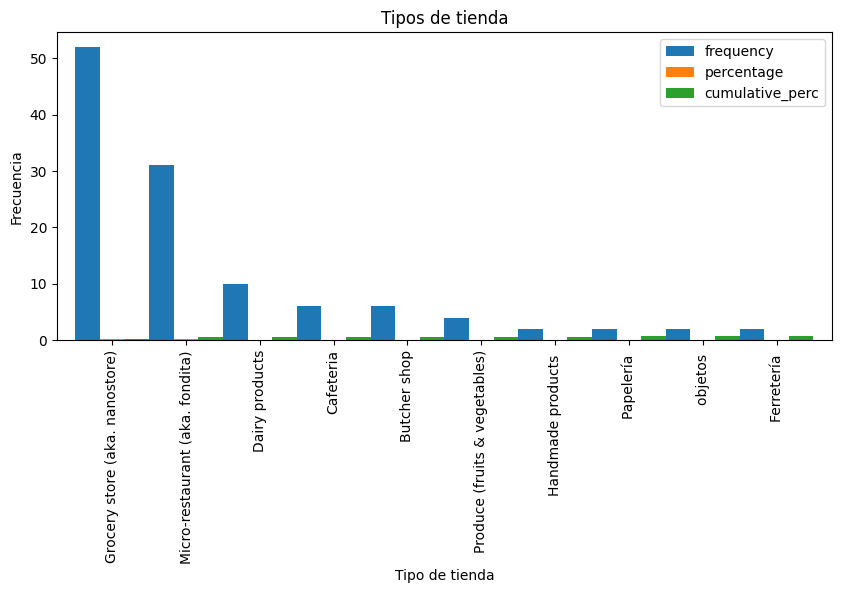

In [156]:
# Barras
    #232_type_of_store
_232 = freq_tbl(micro_retail5["232_type_of_store"])
_232_Filtro = _232[_232["frequency"]>1]
_232_index = _232_Filtro.set_index("232_type_of_store")
_232_index.plot(kind = "bar", width = 1, figsize = (10,4))
plt.title("Tipos de tienda")
plt.xlabel("Tipo de tienda")
plt.ylabel("Frecuencia")


Text(0, 0.5, 'Frecuencia')

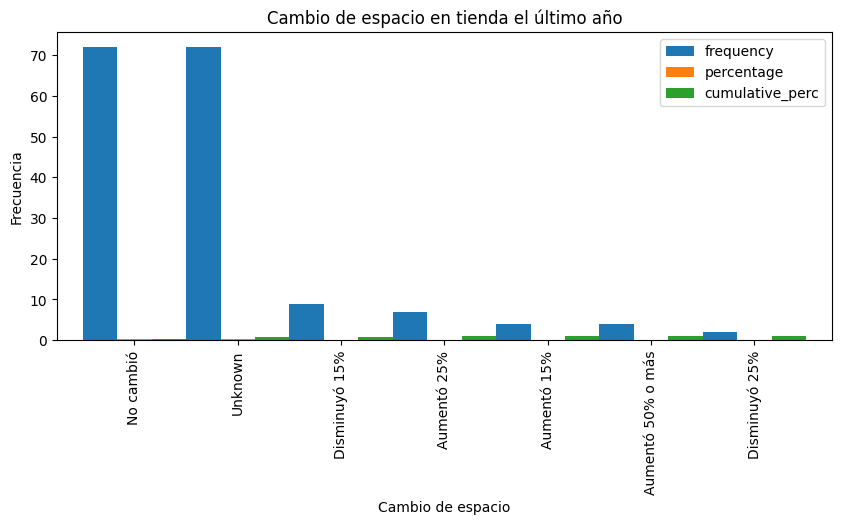

In [157]:
# Barras
    #5_change_store_space_last_year
_5 = freq_tbl(micro_retail5["5_change_store_space_last_year"])
_5_Filtro = _5[_5["frequency"]>1]
_5_index = _5_Filtro.set_index("5_change_store_space_last_year")
_5_index.plot(kind = "bar", width = 1, figsize = (10,4))
plt.title("Cambio de espacio en tienda el último año")
plt.xlabel("Cambio de espacio")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

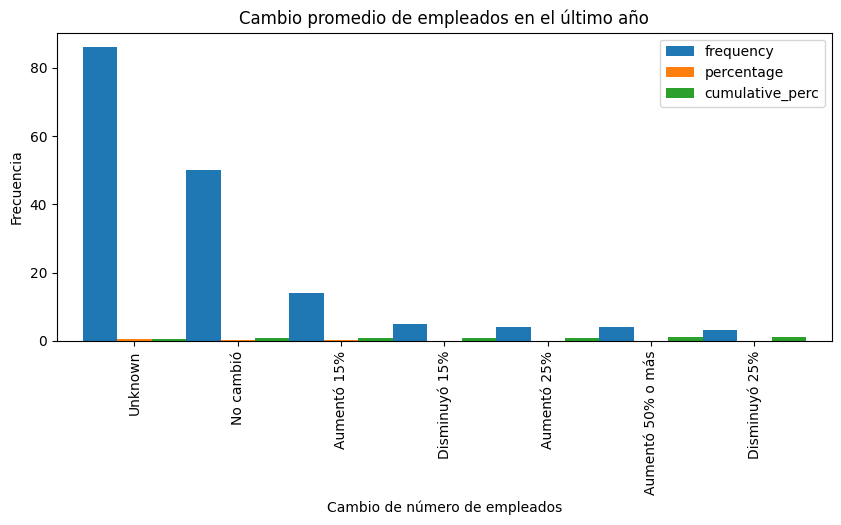

In [158]:
# Barras
    #6_change_employees_average_salary_last_year
_6 = freq_tbl(micro_retail5["6_change_employees_average_salary_last_year"])
_6_Filtro = _6[_6["frequency"]>1]
_6_index = _6_Filtro.set_index("6_change_employees_average_salary_last_year")
_6_index.plot(kind = "bar", width = 1, figsize = (10,4))
plt.title("Cambio promedio de empleados en el último año")
plt.xlabel("Cambio de número de empleados")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

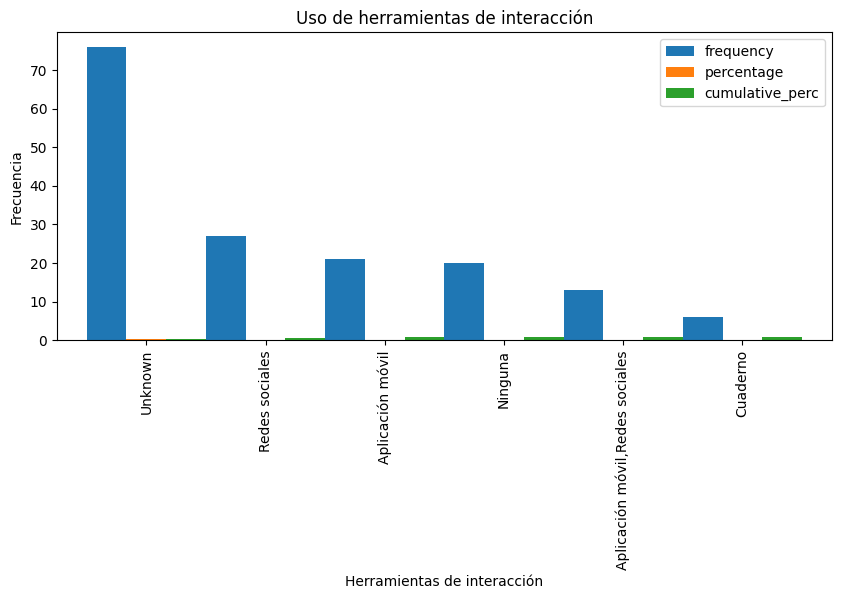

In [159]:
# Barras
    #214_customer_relationship_tools
_214 = freq_tbl(micro_retail5["214_customer_relationship_tools"])
_214_Filtro = _214[_214["frequency"]>1]
_214_index = _214_Filtro.set_index("214_customer_relationship_tools")
_214_index.plot(kind = "bar", width = 1, figsize = (10,4))
plt.title("Uso de herramientas de interacción")
plt.xlabel("Herramientas de interacción")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

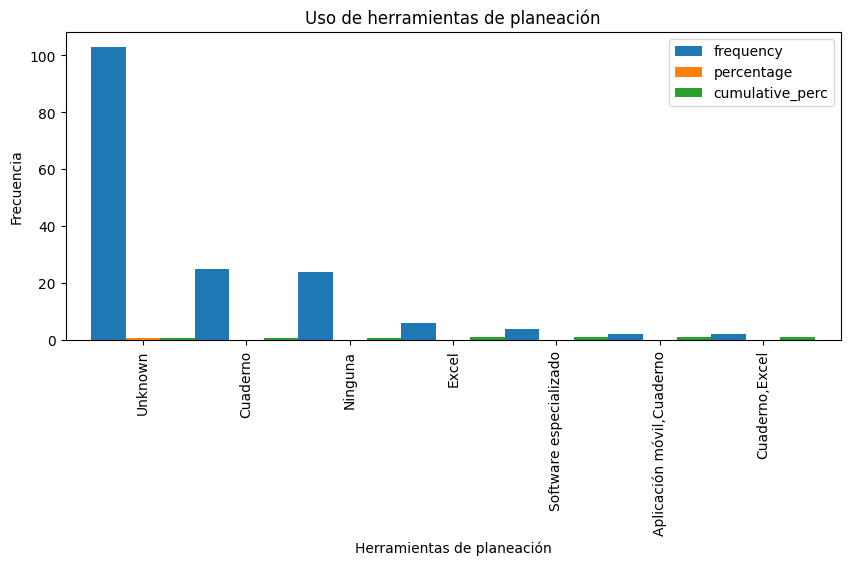

In [160]:
# Barras
    #192_procurement_planning_tools
_192 = freq_tbl(micro_retail5["192_procurement_planning_tools"])
_192_Filtro = _192[_192["frequency"]>1]
_192_index = _192_Filtro.set_index("192_procurement_planning_tools")
_192_index.plot(kind = "bar", width = 1, figsize = (10,4))
plt.title("Uso de herramientas de planeación")
plt.xlabel("Herramientas de planeación")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

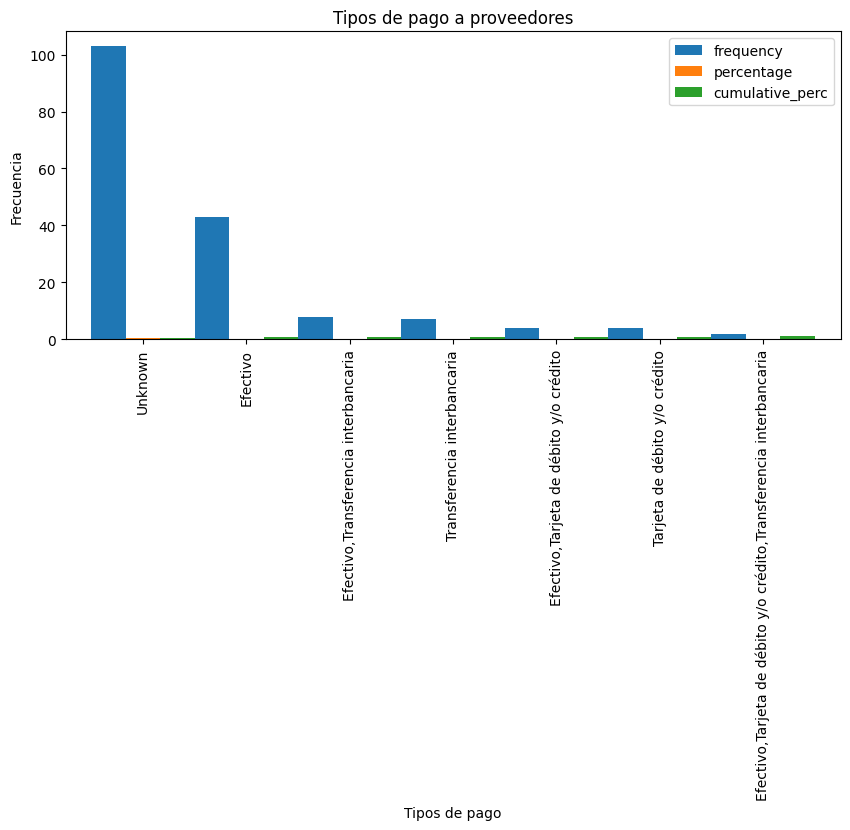

In [161]:
# Barras
    #277_payment_method_suppliers
_277 = freq_tbl(micro_retail5["277_payment_method_suppliers"])
_277_Filtro = _277[_277["frequency"]>1]
_277_index = _277_Filtro.set_index("277_payment_method_suppliers")
_277_index.plot(kind = "bar", width = 1, figsize = (10,4))
plt.title("Tipos de pago a proveedores")
plt.xlabel("Tipos de pago")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

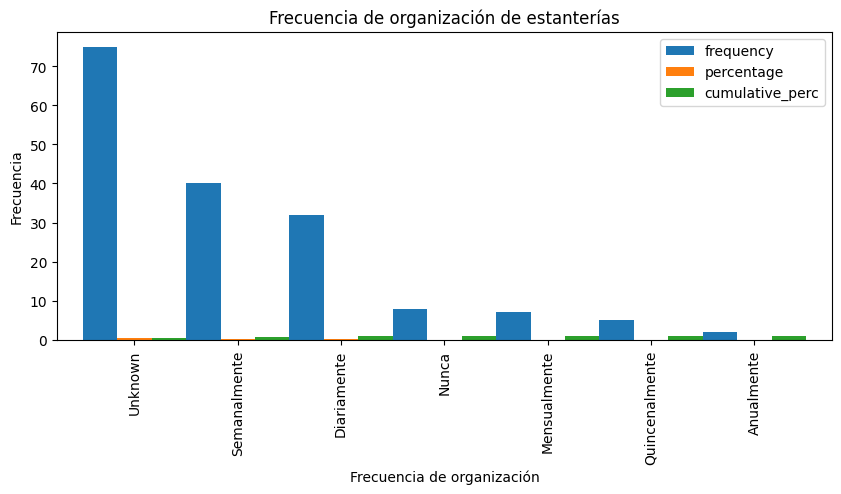

In [162]:
# Barras
    #157_frequency_organize_shelves
_157 = freq_tbl(micro_retail5["157_frequency_organize_shelves"])
_157_Filtro = _157[_157["frequency"]>1]
_157_index = _157_Filtro.set_index("157_frequency_organize_shelves")
_157_index.plot(kind = "bar", width = 1, figsize = (10,4))
plt.title("Frecuencia de organización de estanterías")
plt.xlabel("Frecuencia de organización")
plt.ylabel("Frecuencia")

Text(0.5, 1.0, 'Tiendas con ventanas con barrotes')

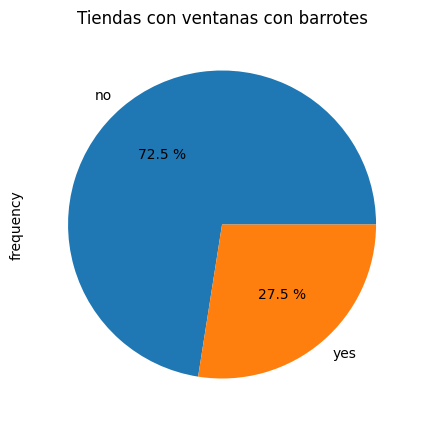

In [163]:
# Pie
    #108_does_the_micro_retailer_has_a_barred_window_
_108 = freq_tbl(micro_retail5["108_does_the_micro_retailer_has_a_barred_window_"])
_108_Filtro = _108[_108["frequency"]>1]
_108_index = _108_Filtro.set_index("108_does_the_micro_retailer_has_a_barred_window_")
_108_index["frequency"].plot(kind = "pie", figsize = (10,5), shadow = False, autopct = "%0.1f %%")
plt.title("Tiendas con ventanas con barrotes")

Text(0.5, 1.0, 'Tiendas que exhiben su producto afuera')

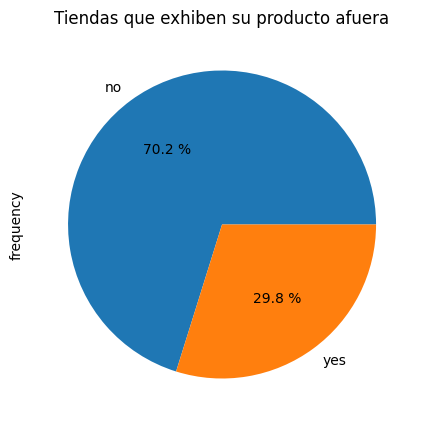

In [164]:
# Pie
    #99_does_the_micro_retailer_exhibits_products_outside_
_99 = freq_tbl(micro_retail5["99_does_the_micro_retailer_exhibits_products_outside_"])
_99_Filtro = _99[_99["frequency"]>1]
_99_index = _99_Filtro.set_index("99_does_the_micro_retailer_exhibits_products_outside_")
_99_index["frequency"].plot(kind = "pie", figsize = (10,5), shadow = False, autopct = "%0.1f %%")
plt.title("Tiendas que exhiben su producto afuera")

Text(0.5, 1.0, 'Tiendas que venden productos buenos')

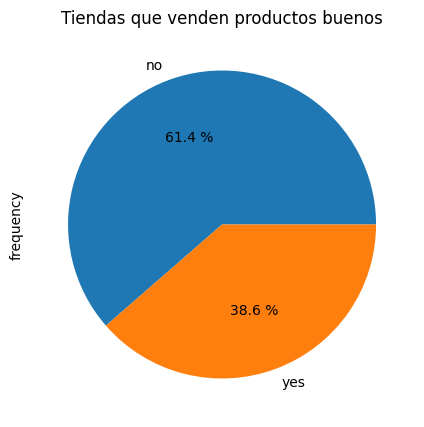

In [165]:
# Pie
    #102_does_the_micro_retailer_sells_fresh_products_
_102 = freq_tbl(micro_retail5["102_does_the_micro_retailer_sells_fresh_products_"])
_102_Filtro = _102[_102["frequency"]>1]
_102_index = _102_Filtro.set_index("102_does_the_micro_retailer_sells_fresh_products_")
_102_index["frequency"].plot(kind = "pie", figsize = (10,5), shadow = False, autopct = "%0.1f %%")
plt.title("Tiendas que venden productos buenos")

Text(0.5, 1.0, 'Revisiones de finanzas mensualmente')

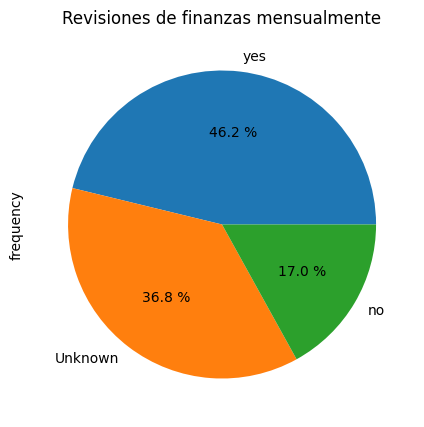

In [166]:
# Pie
    #20_reviews_finances_monthly
_20 = freq_tbl(micro_retail5["20_reviews_finances_monthly"])
_20_Filtro = _20[_20["frequency"]>1]
_20_index = _20_Filtro.set_index("20_reviews_finances_monthly")
_20_index["frequency"].plot(kind = "pie", figsize = (10,5), shadow = False, autopct = "%0.1f %%")
plt.title("Revisiones de finanzas mensualmente")

Text(0.5, 1.0, 'Tiendas con conexión a internet')

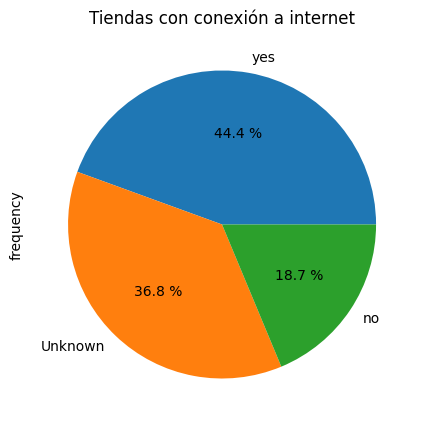

In [167]:
# Pie
    #186_internet_connection
_186 = freq_tbl(micro_retail5["186_internet_connection"])
_186_Filtro = _186[_186["frequency"]>1]
_186_index = _186_Filtro.set_index("186_internet_connection")
_186_index["frequency"].plot(kind = "pie", figsize = (10,5), shadow = False, autopct = "%0.1f %%")
plt.title("Tiendas con conexión a internet")

Text(0.5, 1.0, 'Tiendas con crédito a clientes')

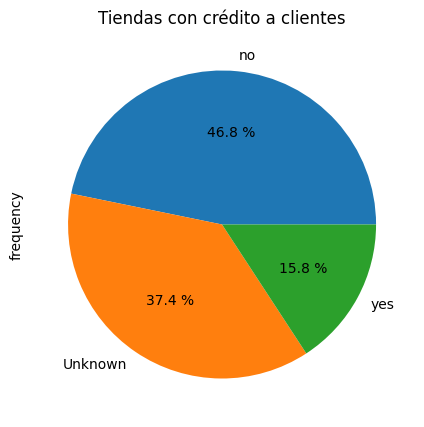

In [168]:
# Pie
    #33_credit_to_customers
_33 = freq_tbl(micro_retail5["33_credit_to_customers"])
_33_Filtro = _33[_33["frequency"]>1]
_33_index = _33_Filtro.set_index("33_credit_to_customers")
_33_index["frequency"].plot(kind = "pie", figsize = (10,5), shadow = False, autopct = "%0.1f %%")
plt.title("Tiendas con crédito a clientes")

Text(0.5, 1.0, 'Apertura a participar en talleres')

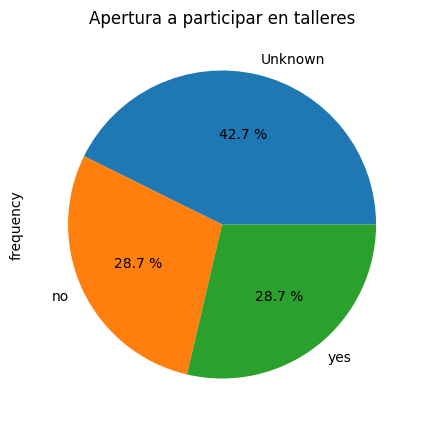

In [169]:
# Pie
    #234_willingness_participate_workshop
_234 = freq_tbl(micro_retail5["234_willingness_participate_workshop"])
_234_Filtro = _234[_234["frequency"]>1]
_234_index = _234_Filtro.set_index("234_willingness_participate_workshop")
_234_index["frequency"].plot(kind = "pie", figsize = (10,5), shadow = False, autopct = "%0.1f %%")
plt.title("Apertura a participar en talleres")